<a href="https://colab.research.google.com/github/arielbogado97/K-means-Python-R/blob/main/K_means_%7C_Fifa22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering con Python**

La agrupación de K-Means es el algoritmo de aprendizaje no supervisado más popular. Se utiliza cuando tenemos datos sin etiquetar, es decir, datos sin categorías ni grupos definidos. El algoritmo sigue una forma fácil o sencilla de clasificar un conjunto de datos determinado a través de un cierto número de grupos, fijados a priori. El algoritmo K-Means funciona de forma iterativa para asignar cada punto de datos a uno de los K grupos en función de las características proporcionadas. Los puntos de datos se agrupan según la similitud de características.

**FIFA 22**

Este proyecto se tiene como implementar el algoritmo **k-means**, utilizando el dataset de fifa 22, el cual tiene datos de los futbolistas, como el nombre, nacionalidad, salario, potencial etc.

Tomaremos como features (atributos) 5 variables que son:



*   **overall** : Habilidad general que tiene el jugador.
*   **potential** : potencial de crecimiento en sus habilidades
*   **wage_eur**  : Salario en Euros
*   **value_eur** : Valor en el mercado en Euros.
*   **age** : Edad del jugador







![texto AL](https://drive.google.com/uc?id=12LY74kSNnMjLOJ7Q9AOcGZFpOlBCOIgh)

In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Acceder al drive
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
os.chdir("/content/drive/MyDrive/Datasets")

Mounted at /content/drive
/content


In [4]:
#Cargamos el dataset
df = pd.read_csv("players_22.csv")
df

<ipython-input-4-fbee12cf4463>:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [5]:
#Seleccionamos los features con los cuales trabajaremos
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [6]:
#Eliminamos los datos faltantes de los features
df = df.dropna(subset = features)

In [7]:
#Creamos un dataframe, que utilizaremos para el modelo
data = df[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


**Normalización de datos**

La normalización en la estala de los datos nos permitirá:



*   Sensibilidad a la escala.
*   Convergencia rápida de los datos.
*   Eliminación de sesgos.

Por lo tanto nos hará llegar a una mejor interpretación de los datos.



In [8]:
#Normalizamos los nustros datos en una escala de [0,9]
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [9]:
#Vemos los estadísticos principales
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
#Vemos los primeros 5 datos
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


**Inicializar centroides aleatorios**

In [11]:
#Creamos una función para generar cebntroides aleatoriamente
def random_centroids(data,k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)


In [12]:
#devolvemos como argumento el dataset y el numero de k utilizaremos para definir el centroide
centroids = random_centroids(data,5)
centroids

,0,1,2,3,4
overall,4.130435,1.782609,4.326087,3.739130,2.565217
potential,7.456522,7.456522,5.304348,4.521739,4.130435
wage_eur,1.000000,1.141631,1.064378,1.006438,1.000000
value_eur,1.073813,1.026259,1.050616,1.050616,1.157322
age,2.333333,1.666667,5.333333,2.666667,5.333333


In [13]:
#Definimos una que funcion que va a calcular las distancias euclidianas entre cada punto del data frame (data) y cada uno de los centroide
def get_labels(data,centroids):
  distances = centroids.apply(lambda x : np.sqrt(((data - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)


In [14]:
#Implementamos la función
labels = get_labels(data, centroids)
labels

0        2
1        2
2        2
3        0
4        2
        ..
19234    4
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [15]:
#Etiquetas distintas
labels.value_counts()

2    8667
3    5686
0    3492
4    1111
1     209
dtype: int64

In [16]:
#Calculamos la media geométrica de cada grupo de datos
def new_cent(data,centroids,k):
  return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T

In [17]:
#Importamos el módulo de PCA para la reducción de dimensionalidad
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [18]:
#Creamos una función para graficar los datos obtenidos
def plot_clusters(data, etiquetas, centroids, iteration):
  pca = PCA(n_components = 2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait = True)
  plt.title(f'Iterations {iteration}')
  plt.scatter(x = data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x = centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()


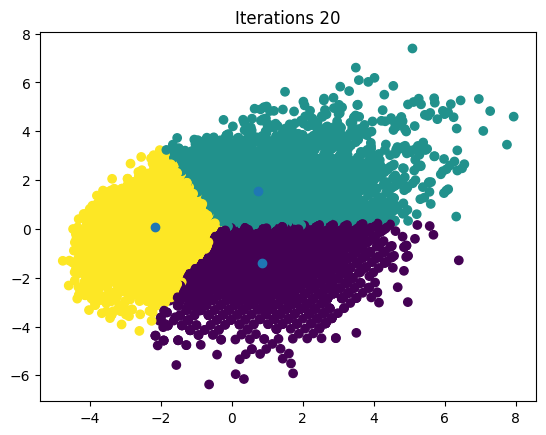

In [19]:
#Creamos un bucle While, con el fin de graficar los los clusters que nos permita visualizar los segmentos
#Con la cantidad de centroides que asignamos arbitrareamente, mismo bucle se irá iterando hasta que no se pueda optimizar
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_cent(data, labels, k)
  plot_clusters(data,labels, centroids, iteration)
  iteration += 1

In [20]:
centroids

,0,1,2
overall,4.784633,5.806043,3.206838
potential,4.506962,6.497993,4.928473
wage_eur,1.118904,1.420001,1.028505
value_eur,1.044980,1.285501,1.026614
age,5.472247,3.596161,2.518708


In [21]:
df[labels == 1][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [22]:
pd.DataFrame(centroids, columns=features).T

,overall,potential,wage_eur,value_eur,age
overall,NaN,NaN,NaN,NaN,NaN
potential,NaN,NaN,NaN,NaN,NaN
wage_eur,NaN,NaN,NaN,NaN,NaN
value_eur,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN


# **Conclusión**

Los resultados que nos arrojó el algoritmo nos sugieren algunas conclusiones:





*   Los futbolista del grupo 2, son los que ganan un salario más alto (wage_eur), tienen mayor puntaje Generar (overall), tienen mayor potencial (potential), son los de pase más valioso (value_eur).

*   Los futbolistas del grupo 1, son los más jovenes, tienen salarios más bajos que el resto, tiene menor puntaje general y tanto el salario como el costo del pase es mucho menor que el grupo 2.

*   Por tanto, podemos concluir que k=3 es el número óptimo de clusters.
